# Imports

In [40]:
import pandas as pd 
import numpy as np 

from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

## Loading CSV

In [3]:
music = pd.read_csv('/Users/kellyjara/Desktop/Music_Classification/Data/music_2.csv')
music_df = pd.DataFrame(music)

## OneHotEncoding Genres

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
genres_df = music_df[['genre_y']]

In [6]:
ohe = OneHotEncoder(sparse = False)

genres_ohe = ohe.fit_transform(genres_df)

ohe_df = pd.DataFrame(genres_ohe, columns = ohe.get_feature_names_out(['genre_y']))

df = pd.concat([music_df, ohe_df], axis = 1)

df.drop(columns = ['genre_y'], inplace = True)

In [7]:
df.drop(columns = 'file_name', inplace = True)

In [8]:
df.drop(columns = 'genre_x', inplace = True)

In [9]:
df

,mfcc_mean,mfcc_var,mfcc_min,mfcc_max,mfcc1_mean,mfcc1_var,mfcc1_min,mfcc1_max,mfcc2_mean,mfcc2_var,...,genre_y_blues,genre_y_classical,genre_y_country,genre_y_disco,genre_y_hiphop,genre_y_jazz,genre_y_metal,genre_y_pop,genre_y_reggae,genre_y_rock
0,-8.942821,64.183520,-1.467964,23.011240,4.736657,6.307176,8.763370,8.697861,0.020061,8.945642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-45.097984,88.633490,8.985597,31.276129,6.828823,15.752106,0.584817,10.050541,0.788925,7.602591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-106.645210,65.831770,12.572899,30.452550,16.271381,3.800628,-1.045976,4.102991,-2.589358,1.586828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-75.366130,83.334880,10.703896,14.455102,14.244521,7.410257,5.279713,-0.400126,5.717757,3.361804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-69.001930,73.770000,-12.468982,9.536624,-0.045610,12.718271,3.165059,-0.084658,2.522358,2.874675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,-147.263640,88.613090,-5.508493,17.767538,3.232844,3.489528,1.577688,4.755512,-5.777406,5.531152,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1728,-117.149660,99.081245,-0.484232,26.842184,4.783892,6.124170,-1.773161,8.033392,-0.388932,4.132214,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1729,-97.885620,101.003600,-40.547610,51.050190,-11.709620,25.064747,-14.048207,17.197395,-9.623669,16.973530,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1730,-51.776085,70.331350,-3.911701,49.742280,1.587971,35.703487,-4.088695,24.787909,-9.707024,22.039282,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732 entries, 0 to 1731
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mfcc_mean          1732 non-null   float64
 1   mfcc_var           1732 non-null   float64
 2   mfcc_min           1732 non-null   float64
 3   mfcc_max           1732 non-null   float64
 4   mfcc1_mean         1732 non-null   float64
 5   mfcc1_var          1732 non-null   float64
 6   mfcc1_min          1732 non-null   float64
 7   mfcc1_max          1732 non-null   float64
 8   mfcc2_mean         1732 non-null   float64
 9   mfcc2_var          1732 non-null   float64
 10  mfcc2_min          1732 non-null   float64
 11  mfcc2_max          1732 non-null   float64
 12  delta_mean         1732 non-null   float64
 13  delta_var          1732 non-null   float64
 14  delta2_mean        1732 non-null   float64
 15  delta2_var         1732 non-null   float64
 16  harmonic_mean      1732 

## Train-Test-Split

In [68]:
X = df.drop(columns=['genre_y_blues', 'genre_y_classical', 'genre_y_country', 'genre_y_disco', 'genre_y_hiphop',
                     'genre_y_jazz', 'genre_y_metal', 'genre_y_pop', 'genre_y_reggae', 'genre_y_rock'])
y = df[['genre_y_blues', 'genre_y_classical', 'genre_y_country', 'genre_y_disco', 'genre_y_hiphop',
        'genre_y_jazz', 'genre_y_metal', 'genre_y_pop', 'genre_y_reggae', 'genre_y_rock']]

In [46]:
#train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 42)

#validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

In [47]:
#normalizing
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Decision Tree - Model 1

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [49]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, random_state = 24)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=24)

In [50]:
print('Training:', dt.score(X_train_scaled, y_train))
print('Test:', dt.score(X_test_scaled, y_test))

Training: 0.928709055876686
Test: 0.5129682997118156


In [51]:
dt_pred = dt.predict(X_test_scaled)

In [52]:
dt_acc = accuracy_score(y_test, dt_pred)
print('Accuracy:', dt_acc)
dt_pre = precision_score(y_test, dt_pred, average = 'macro')
print('Precision:', dt_pre)
dt_re = recall_score(y_test, dt_pred, average = 'macro')
print('Recall:', dt_re)

Accuracy: 0.5129682997118156
Precision: 0.5449918977922298
Recall: 0.513978159368359


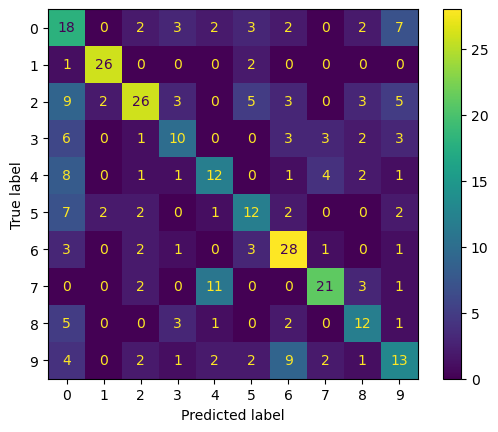

In [53]:
dt_cm = confusion_matrix(y_test.values.argmax(axis = 1),
                        dt_pred.argmax(axis = 1));
ConfusionMatrixDisplay(dt_cm).plot()

In [54]:
roc_auc_score(y_test, dt_pred)

0.7337223734403174

### Random Forest - Model 2

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [57]:
rf_pred = rf.predict(X_test_scaled)

In [58]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print('Accuracy:', rf_accuracy)
rf_precision = precision_score(y_test, rf_pred, average = 'macro')
print('Precision:',rf_precision)
rf_recall = recall_score(y_test, rf_pred, average = 'macro')
print('Recall:',rf_recall)

Accuracy: 0.42363112391930835
Precision: 0.9900462962962961
Recall: 0.41221798971345247


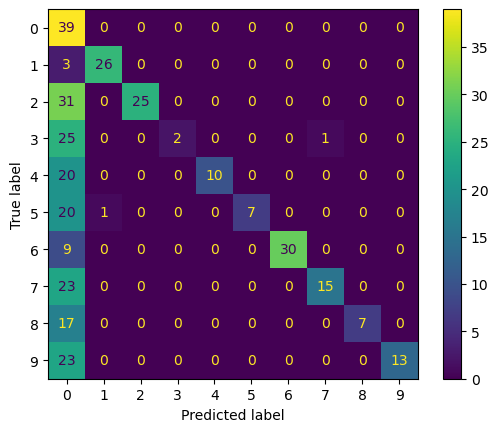

In [59]:
rf_cm =confusion_matrix(y_test.values.argmax(axis=1), 
                        rf_pred.argmax(axis=1));
ConfusionMatrixDisplay(rf_cm).plot()

### SVM GS Model

In [69]:
#target variable into a binary matrix
y = y.idxmax(axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
param = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

In [71]:
svm_model = SVC()
svm_gs = GridSearchCV(svm_model, param, cv=5, n_jobs=-1)
svm_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [73]:
best_params = svm_gs.best_params_
best_model = svm_gs.best_estimator_

In [74]:
svm_pred = best_model.predict(X_test)

In [76]:
accuracy = accuracy_score(y_test, svm_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, svm_pred))

Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.6772334293948127

Classification Report:
                    precision    recall  f1-score   support

    genre_y_blues       0.70      0.72      0.71        39
genre_y_classical       0.93      0.97      0.95        29
  genre_y_country       0.67      0.71      0.69        56
    genre_y_disco       0.43      0.43      0.43        28
   genre_y_hiphop       0.59      0.67      0.62        30
     genre_y_jazz       0.58      0.54      0.56        28
    genre_y_metal       0.70      0.90      0.79        39
      genre_y_pop       0.69      0.66      0.68        38
   genre_y_reggae       0.67      0.58      0.62        24
     genre_y_rock       0.82      0.50      0.62        36

         accuracy                           0.68       347
        macro avg       0.68      0.67      0.67       347
     weighted avg       0.68      0.68      0.67       347



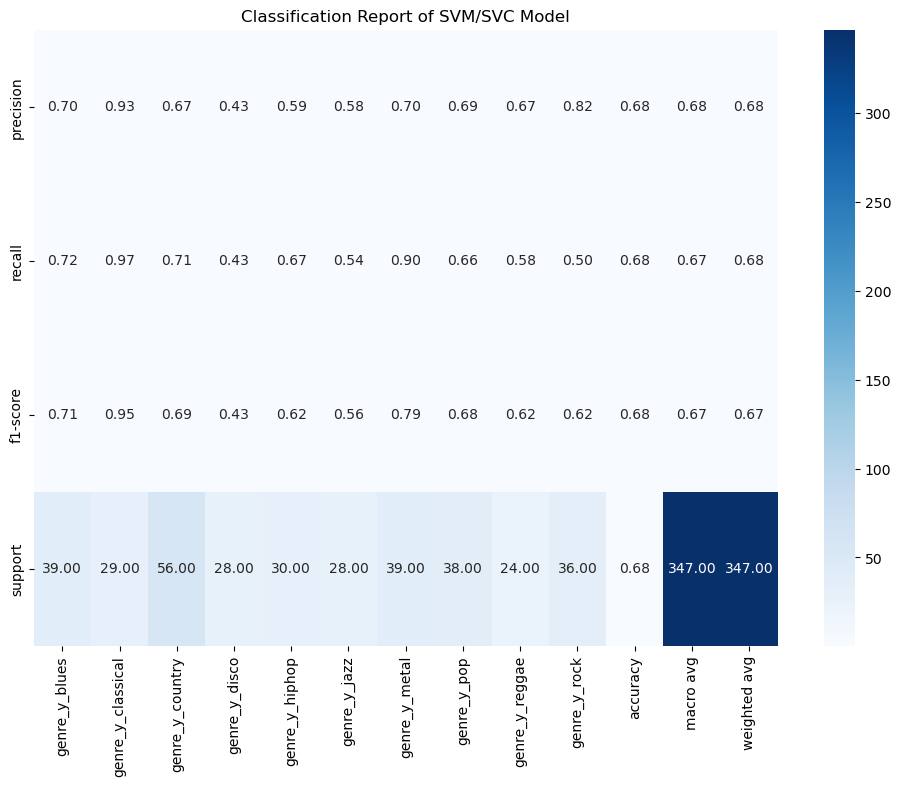

In [78]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame.from_dict(classification_report(y_test, svm_pred, output_dict=True)), annot=True, cmap='Blues', fmt='.2f')
plt.title("Classification Report of SVM/SVC Model")
plt.show()

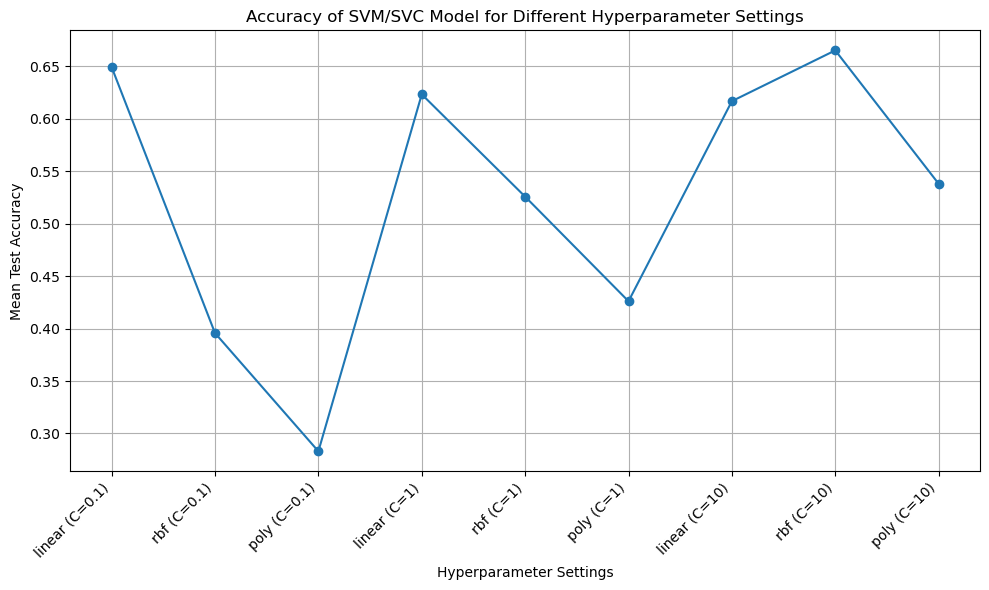

In [85]:
results = svm_gs.cv_results_

params = results['params']
mean_test_scores = results['mean_test_score']

labels = [f"{param['kernel']} (C={param['C']})" for param in params]

plt.figure(figsize=(10, 6))
plt.plot(labels, mean_test_scores, marker='o')
plt.xlabel('Hyperparameter Settings')
plt.ylabel('Mean Test Accuracy')
plt.title('Accuracy of SVM/SVC Model for Different Hyperparameter Settings')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.tight_layout()
plt.show()

### K Nearest Neighbor - Model 3

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

In [27]:
def cross_val(X_train, y_train, k, num_split = 20):

    X_train = X_train.values
    y_train = y_train.values
    
    score_train_list = []
    score_val_list = []
    
    for train_index, valid_index in KFold(n_splits = num_split).split(X_train):
       
        #train & validation splitting (folds)
        X_train_fold, X_val_fold = X_train[train_index], X_train[valid_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[valid_index]
        
        #scaling and fitting on the train/val fold 
        scaler = StandardScaler()
        X_tf_sc = scaler.fit_transform(X_train_fold)
        X_vld_sc = scaler.transform(X_val_fold)
        
        #creating and fitting knn 
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        knn.fit(X_tf_sc, y_train_fold)
        
        #scores
        acc_tr = knn.score(X_tf_sc, y_train_fold)
        acc_val = knn.score(X_vld_sc, y_val_fold)
        score_val_list.append(acc_val)
        score_train_list.append(acc_tr)
        
    return {'k': k, 'train': np.mean(score_train_list), 
                                    'validation': np.mean(score_val_list)}

In [28]:
crossval_df = pd.DataFrame(columns = ['k', 'train', 'validation'])

for k in range(1, 100):
    result = cross_val(X_train, y_train, k, 5)
    crossval_df = crossval_df.append(result, ignore_index=True)

In [29]:
crossval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   k           99 non-null     float64
 1   train       99 non-null     float64
 2   validation  99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


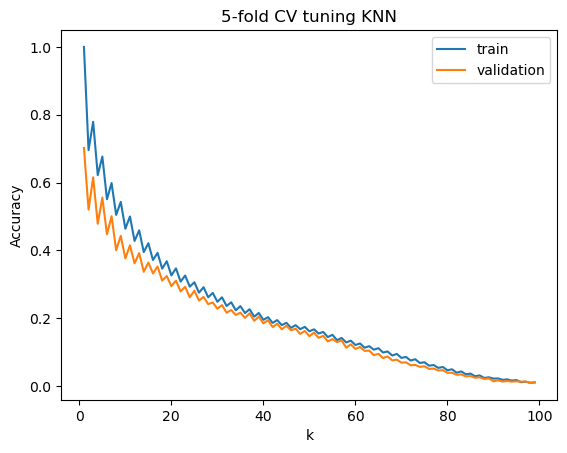

In [30]:
fig, ax = plt.subplots()
sns.lineplot(x = 'k', y = 'train', 
             data = crossval_df, 
             ax = ax, label = 'train')
sns.lineplot(x = 'k', y = 'validation', 
             data = crossval_df,
             ax = ax, label = 'validation')
ax.set_ylabel('Accuracy')
ax.set_title('5-fold CV tuning KNN')
plt.show()

In [31]:
crossval_df.iloc[crossval_df['validation'].idxmax()]

k             1.000000
train         1.000000
validation    0.702281
Name: 0, dtype: float64

In [32]:
fulltrain_scaler = StandardScaler()
X_train_sc = fulltrain_scaler.fit_transform(X_train)
X_test_sc = fulltrain_scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_sc, y_train)

knn_pred = knn.predict(X_test_sc)

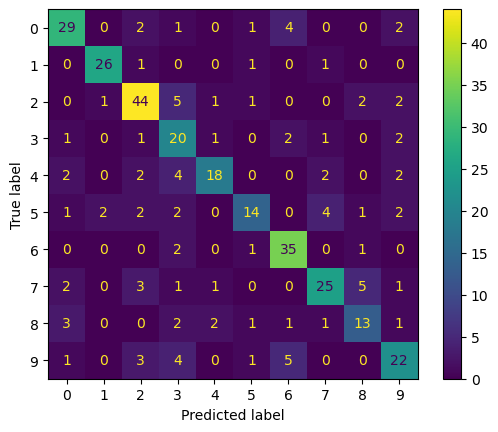

In [33]:
knn_cm =confusion_matrix(y_test.values.argmax(axis=1), 
                        knn_pred.argmax(axis=1));
ConfusionMatrixDisplay(knn_cm).plot()

In [34]:
knn_accuracy = accuracy_score(y_test, knn_pred)
print('Accuracy:', knn_accuracy)
knn_precision = precision_score(y_test, knn_pred, average = 'macro')
print('Precission:',knn_precision)
knn_recall = recall_score(y_test, knn_pred, average = 'macro')
print('Recall:',knn_recall)

Accuracy: 0.7089337175792507
Precission: 0.7087118614233193
Recall: 0.6948249879783456
